In [ ]:
import numpy as np
import pandas as pd

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords

In [9]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [11]:

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [14]:

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [15]:

df.rename(columns = {'v1': 'label', 'v2': 'text'}, inplace=True)

In [16]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# text to label value
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# check if there is any missing value
df.isnull().sum()

label    0
text     0
dtype: int64

In [19]:
# check if there is any duplicates
df.duplicated().sum()

403

In [20]:
df.drop_duplicates(keep = 'first', inplace = True)

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(5169, 2)

In [23]:
df['label'].value_counts()

0    4516
1     653
Name: label, dtype: int64

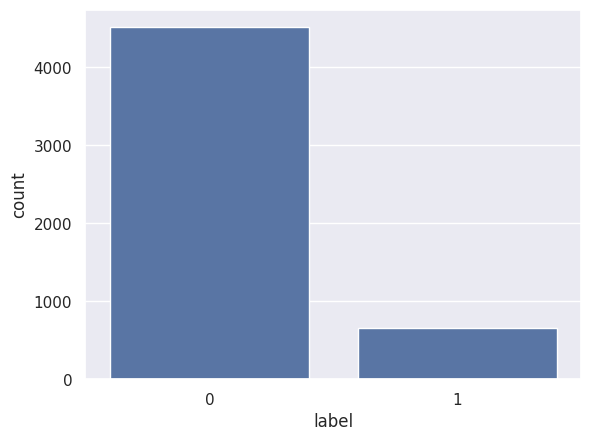

In [70]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(x=df['label']);

In [25]:

df['total_char'] = df['text'].apply(len)
df['total_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['total_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,label,text,total_char,total_words,total_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
summary_columns = ['total_char', 'total_words', 'total_sentences']
df[summary_columns].describe()

,total_char,total_words,total_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['label'] == 0][summary_columns].describe()

,total_char,total_words,total_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['label'] == 1][summary_columns].describe()

,total_char,total_words,total_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


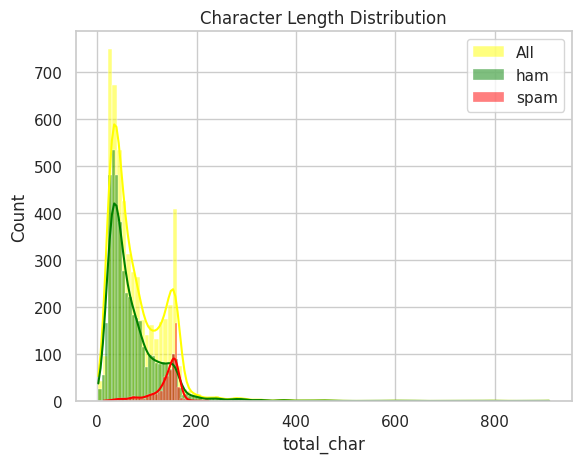

In [69]:
sns.histplot(data=df['total_char'], label='All', color='yellow', kde=True)
sns.histplot(data=df[df['label'] == 0]['total_char'], label='ham', color='green', kde=True)
sns.histplot(data=df[df['label'] == 1]['total_char'], label = 'spam', color='red', kde=True)
plt.legend()
plt.title('Character Length Distribution')
plt.show();

In [30]:

import re
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [31]:
def text_process(text):
    r = re.sub('[^a-zA-Z]', ' ', text)
    r = r.lower()
    r = r.split()
    r = [ps.stem(word) for word in r if not word in stopwords.words('english')]
    r = " ".join(r)
    return r

df['processed_text'] = df['text'].apply(text_process)
df.head()

,label,text,total_char,total_words,total_sentences,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:

corpus = []
for text in df['processed_text']:
    corpus.append(text)

In [33]:
spam_text = df[df['label']==1]['processed_text'].str.cat(sep=" ")

In [34]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [35]:
spam_wc = wc.generate(spam_text)

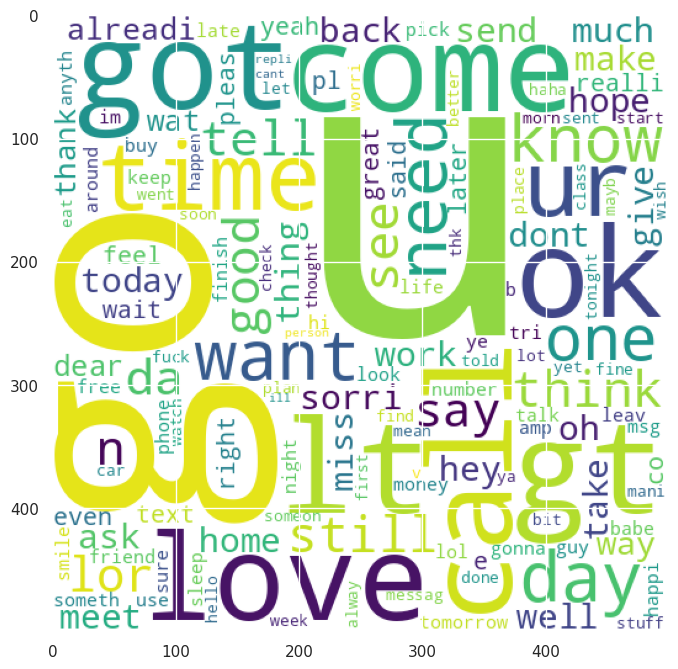

In [71]:

plt.figure(figsize=(8,8))
plt.imshow(spam_wc)
plt.show();

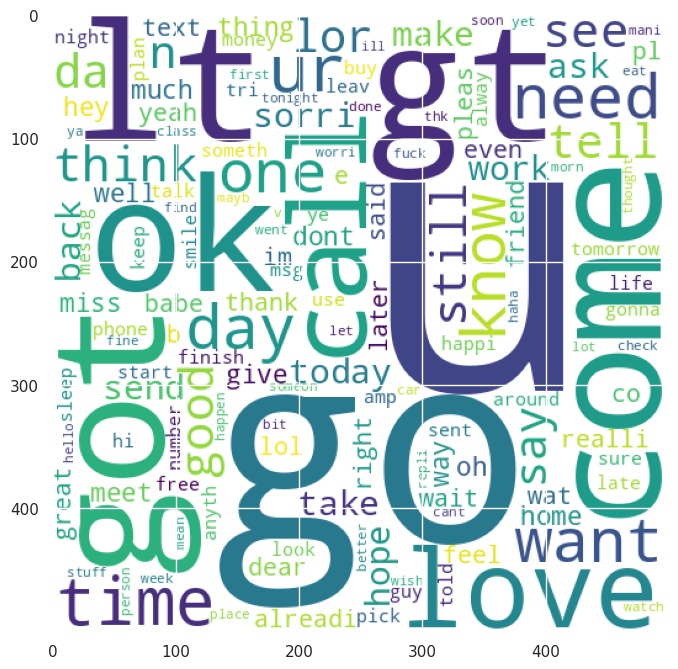

In [72]:
ham_text = df[df['label']==0]['processed_text'].str.cat(sep = " ")
ham_wc = wc.generate(ham_text)

plt.figure(figsize=(8,8))
plt.imshow(ham_wc)
plt.show();

In [38]:
spam_corpus_words = []
for sent in df[df['label']==1]['processed_text']:
    tokens = nltk.word_tokenize(sent)
    for token in tokens:
        spam_corpus_words.append(token)

In [39]:
from collections import Counter
filter_spam_df = pd.DataFrame(Counter(spam_corpus_words).most_common(20))

In [40]:
filter_spam_df

,0,1
0,call,346
1,free,197
2,p,158
3,u,157
4,txt,152
5,text,129
6,mobil,121
7,ur,119
8,stop,114
9,repli,104


<ipython-input-64-387ee4d024d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_spam_df, x = filter_spam_df[0], y = filter_spam_df[1], palette='dark')


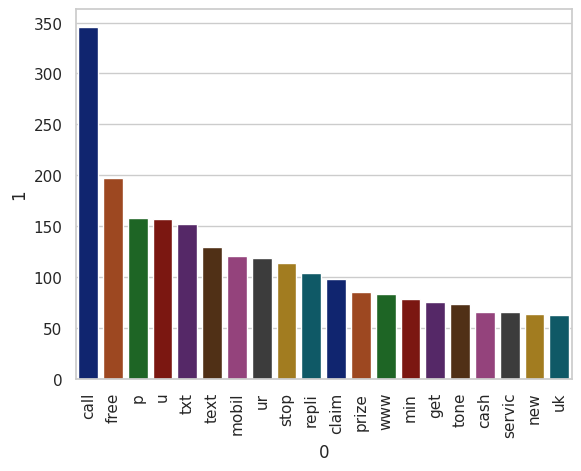

In [64]:
sns.barplot(data = filter_spam_df, x = filter_spam_df[0], y = filter_spam_df[1], palette='dark')
plt.xticks(rotation = 90)
plt.show();

In [43]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [44]:
# initialization of the models
lr_clf = LogisticRegression()
svm_clf = SVC(kernel='sigmoid')
mn_clf = MultinomialNB()
rf_clf = RandomForestClassifier()
adb_clf = AdaBoostClassifier()
xgb_clf = XGBClassifier()

In [45]:
classifiers = [lr_clf, svm_clf, mn_clf, rf_clf, adb_clf, xgb_clf]

In [46]:
# Import traing test split and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [47]:
y = df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [49]:
X_bow = cv.fit_transform(df['processed_text']).toarray()
X_tfidf = tfidf.fit_transform(df['processed_text']).toarray()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.30, random_state=42)

In [51]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    print(clf)
    print(f'-----------')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'-------------------------------------------')


LogisticRegression()
-----------
Accuracy: 0.9522888459058672
Precision: 0.9620253164556962
-------------------------------------------
SVC(kernel='sigmoid')
-----------
Accuracy: 0.97678916827853
Precision: 0.96
-------------------------------------------
MultinomialNB()
-----------
Accuracy: 0.9580915538362347
Precision: 1.0
-------------------------------------------
RandomForestClassifier()
-----------
Accuracy: 0.9722759509993553
Precision: 0.9836065573770492
-------------------------------------------
AdaBoostClassifier()
-----------
Accuracy: 0.968407479045777
Precision: 0.9211822660098522
-------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
        

In [52]:
word_corpus = []
for sent in df['processed_text']:
    # word_tokenize
    tokens = nltk.word_tokenize(sent)
    for token in tokens:
        word_corpus.append(token)

In [53]:
from gensim.models import Word2Vec

# initializing the model
model = Word2Vec(window = 5, min_count= 2)
model.build_vocab(word_corpus)

# training the model
model.train(word_corpus, total_examples=model.corpus_count, epochs=10)

(333660, 1922070)

In [54]:
def document_vector(doc):
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    if not doc:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

In [55]:
df['processed_text'].values[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [56]:
document_vector(df['processed_text'].values[0])

array([-0.07975589,  0.10836536,  0.07321182,  0.18888897, -0.02897356,
       -0.09617706,  0.20655581,  0.2220049 , -0.18102959, -0.1403926 ,
        0.16966054, -0.12814233, -0.04742238,  0.14937901, -0.00895631,
       -0.04208929,  0.08546115,  0.24552444, -0.23605092, -0.21511093,
        0.01774821,  0.07948181,  0.30589038,  0.09493817,  0.09287939,
        0.0241802 , -0.02765935, -0.00192125, -0.09001365, -0.07257849,
        0.08153204, -0.09284116,  0.12864996, -0.03606998, -0.05642193,
        0.06561545,  0.18425985, -0.0747482 , -0.00128849, -0.1116948 ,
       -0.00065406, -0.08593091, -0.15874465, -0.02646466,  0.01806017,
        0.07070841, -0.13726977, -0.0135037 , -0.00100163, -0.02543498,
       -0.02825441, -0.22482996, -0.17206196, -0.01305564, -0.07703152,
       -0.03339491,  0.12084839, -0.18999806, -0.07567066, -0.00198486,
       -0.04497176, -0.02676274,  0.22345272, -0.12933388, -0.12996927,
        0.18636364, -0.05085148,  0.11097383, -0.21447253,  0.02

In [57]:

from tqdm import tqdm

X = []
for doc in tqdm(df['processed_text'].values):
    v = document_vector(doc)
    X.append(document_vector(doc))

100%|██████████| 5169/5169 [00:00<00:00, 6785.41it/s]


In [58]:
X = np.array(X)

In [59]:

X.shape

(5169, 100)

In [60]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [62]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8974854932301741